In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# voy a importar Counter para poder contar los elementos que hayan en la lista de generos
from collections import Counter
from itertools import chain

movies = pd.read_parquet("dataset/movies.parquet")
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45454 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45454 non-null  float64
 1   id            45454 non-null  float64
 2   overview      44500 non-null  object 
 3   popularity    45451 non-null  float64
 4   revenue       45451 non-null  float64
 5   runtime       45194 non-null  float64
 6   status        45370 non-null  object 
 7   title         45454 non-null  object 
 8   vote_average  45451 non-null  float64
 9   vote_count    45451 non-null  float64
 10  name_genres   45454 non-null  object 
 11  release_year  45368 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


###
###
###


In [112]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.545400e+04,45454.000000,45451.000000,4.545100e+04,45194.000000,45451.000000,45451.000000,45368.000000
mean,4.225399e+06,108348.389075,2.921765,1.121157e+07,94.133093,5.618543,109.917538,1991.879783
std,1.742576e+07,112445.975875,6.005910,6.433842e+07,38.406223,1.924085,491.356914,24.056453
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000
25%,0.000000e+00,26447.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000,1978.000000
50%,0.000000e+00,60004.000000,1.127613,0.000000e+00,95.000000,6.000000,10.000000,2001.000000
75%,0.000000e+00,157304.000000,3.679334,0.000000e+00,107.000000,6.800000,34.000000,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000


- *los percentiles 25, 50 y 75 en budget como en revenue aparecen en 0, estos columnas me dan buena info, gracias a estas puedo suponer cosas como:  
.Que si el presupuesto es alto, fue una super produccion, y por lo tanto es una produccion que se espere sea taquillera  
.Si es bajo, es posible que sea una pelicula del estilo cine independiente, por lo que el publico es mas reducido  
.Mientras que si el revenue es bajo hay una alta probabilidad que al publico no les gusto la pelicula  
.Si es alto, es por que fue bien recibida por los espectadores*  

- *los datos de runtime(duracion de la pelicula en minutos) van desde 0 a 1256, por lo que claramente hay datos que estan mal cargados*

- *vote_average parace tener una distribucion adecuada, una vez grafique me voy a sacar la duda de si hay datos fuera de lo normal*

---

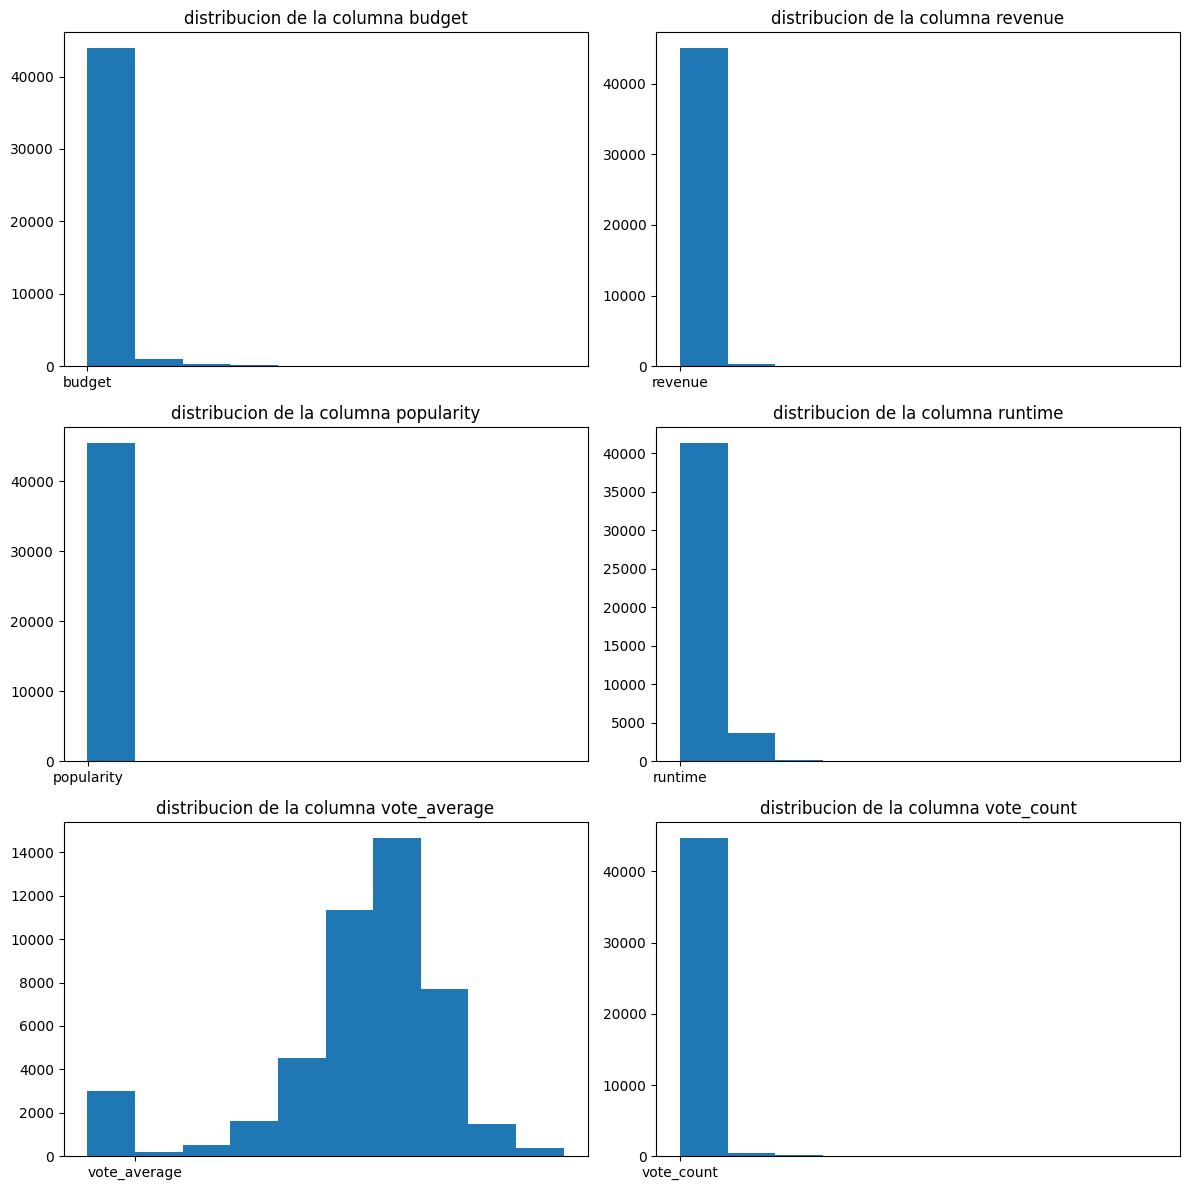

In [113]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Define the columns to plot
columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']

# La i va a ser el indice de cada subplot y ax representa la posicion donde se va a graficar este
for i, ax in enumerate(axs.flat):
    column = columns[i]
    ax.hist([movies[column]])
    ax.set_title(f"distribucion de la columna {column}")
    ax.set_xticks([1])
    ax.set_xticklabels([column])

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

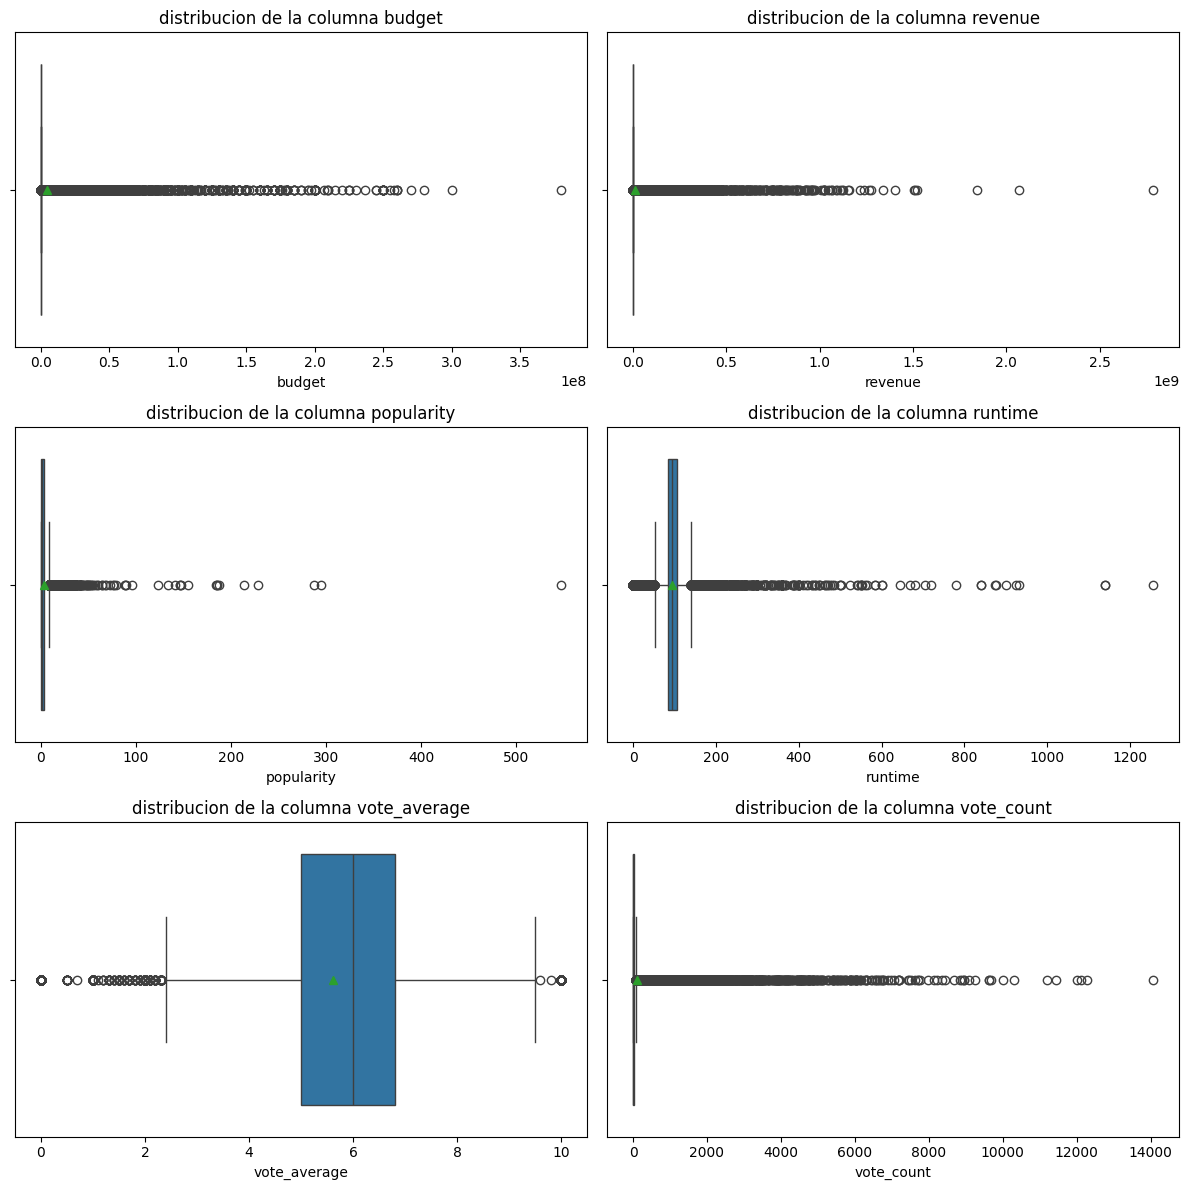

In [114]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']

for i, ax in enumerate(axs.flat):
    column = columns[i]
    sns.boxplot(x=movies[column], showmeans=True, ax=ax)
    ax.set_title(f"distribucion de la columna {column}")

fig.tight_layout()

plt.show()

viendo esto me doy la idea que la unica que podria llegar a ser util es vote_average, muchas de estas estan sesgadas, y apenas se llega a ver el valor maximo dandome a entender que no esta muy bien distribuida la data, respecto a la representacion grafica de cajas y bigotes tambien tenemos la anomalia de ver que en muchas ni siquiera se forma el cuerpo de la caja. Como diria Arnaldo "Hasta la vista columnas"

###
###
###

In [115]:
movies = movies.drop(['runtime','popularity','budget','revenue','vote_count'],axis=1)
movies.head()

,id,overview,status,title,vote_average,name_genres,release_year
0,862.0,"Led by Woody, Andy's toys live happily in his ...",Released,Toy Story,7.7,"[Animation, Comedy, Family]",1995.0
1,8844.0,When siblings Judy and Peter discover an encha...,Released,Jumanji,6.9,"[Adventure, Fantasy, Family]",1995.0
2,15602.0,A family wedding reignites the ancient feud be...,Released,Grumpier Old Men,6.5,"[Romance, Comedy]",1995.0
3,31357.0,"Cheated on, mistreated and stepped on, the wom...",Released,Waiting to Exhale,6.1,"[Comedy, Drama, Romance]",1995.0
4,11862.0,Just when George Banks has recovered from his ...,Released,Father of the Bride Part II,5.7,[Comedy],1995.0


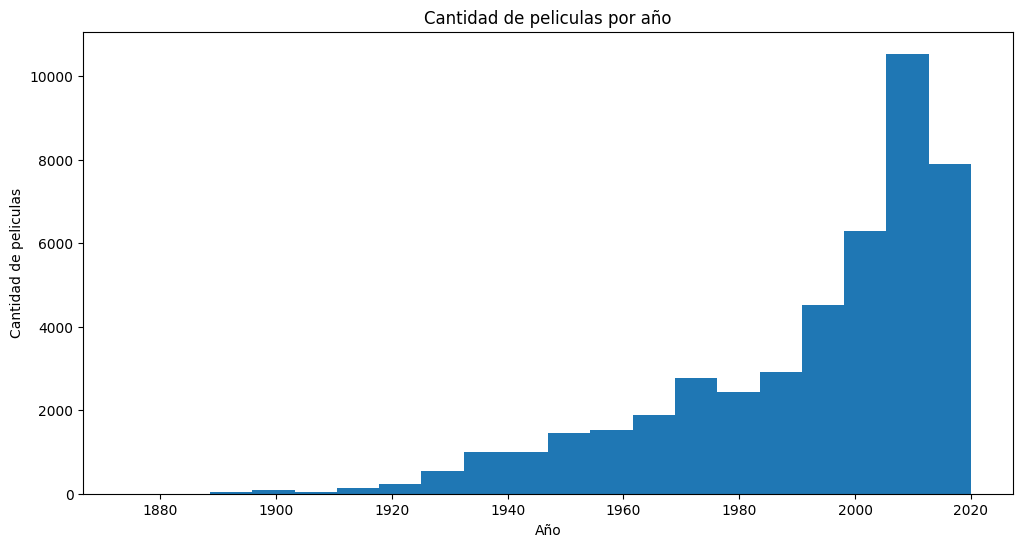

In [116]:
plt.figure(figsize=(12, 6))
plt.hist(movies['release_year'], bins=20)
plt.xlabel('Año')
plt.ylabel('Cantidad de peliculas')
plt.title('Cantidad de peliculas por año')
plt.show()

In [117]:
movies.status.value_counts()


status
Released           45006
Rumored              230
Post Production       98
In Production         19
Planned               15
Canceled               2
Name: count, dtype: int64

Bueno, claramente la industria ha tenido un crecimiento desde sus primeros años, y cada epoca ha tenido un boom o formas de narrar las historias por lo que podria considerar al año como un dato relevante para el entrenamiento

limpiamos algunas filas con datos nulos

In [118]:
movies.dropna(inplace=True)

In [119]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44363 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            44363 non-null  float64
 1   overview      44363 non-null  object 
 2   status        44363 non-null  object 
 3   title         44363 non-null  object 
 4   vote_average  44363 non-null  float64
 5   name_genres   44363 non-null  object 
 6   release_year  44363 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.7+ MB


###
###
###


- Ahora voy a convertir los datos name_genres

In [120]:
movies_desanidados = movies.explode('name_genres')
movies_desanidados = movies_desanidados.reset_index(drop=True)

movies_desanidados.name_genres.value_counts()

name_genres
Drama              19997
Comedy             12792
Thriller            7577
Romance             6664
Action              6554
Horror              4651
Crime               4263
Documentary         3864
Adventure           3466
Science Fiction     3018
Family              2728
Mystery             2447
Fantasy             2290
Animation           1916
Foreign             1588
Music               1587
History             1378
War                 1308
Western             1035
TV Movie             750
Name: count, dtype: int64

In [121]:
idiomas_frecuentes = conteo_idiomas.head(10).index
df_peliculas = df_peliculas[df_peliculas['original_language'].isin(idiomas_frecuentes)]
# Creo una máscara booleana para identificar las filas a eliminar
mask = ~df_peliculas['original_language'].isin(idiomas_frecuentes)

# Elimino las filas que no cumplen la condición
df_peliculas.drop(df_peliculas[mask].index, inplace=True)

# Creo otra máscara temporal para evaluar cuales peliculas tienen un promedio de votos mayor a 7
mask_vote = df_peliculas['vote_average'] > 7

# Aplicamos la máscara al DataFrame
df_peliculas_filtrado = df_peliculas[mask_vote]

from wordcloud import WordCloud

# Creo una nube de palabras para la columna "tagline" para interpretar gráficamente las palabras más valoradas por los usuarios
text = ' '.join(df_peliculas_filtrado['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

NameError: name 'conteo_idiomas' is not defined